In [2]:
!pip install -Uqq fastai nbdev graphviz azure-cognitiveservices-search-imagesearch

In [3]:
from fastai.vision.all import *
from utils import *

In [4]:
labels = ['minecraft', 'real-world']
queries = ['minecraft world photography', 'national geographic nature photography']
path = Path('sceneries')

if not path.exists():
    path.mkdir()
    for idx, o in enumerate(labels):
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(queries[idx])
        download_images(dest, urls=results)

In [5]:
fns = get_image_files(path)
len(fns)

335

In [6]:
failed = verify_images(fns)
len(failed)

0

In [7]:
failed.map(Path.unlink);

In [8]:
sceneries = DataBlock(
     blocks=(ImageBlock, CategoryBlock),
     get_items=get_image_files,
     splitter=RandomSplitter(valid_pct=0.2, seed=42),
     get_y=parent_label,
     item_tfms=Resize(128))
dls = sceneries.dataloaders(path)

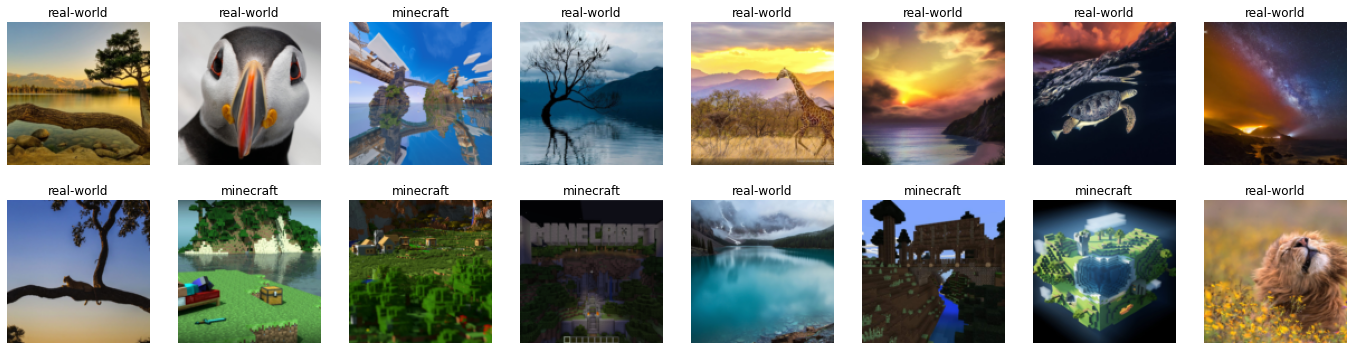

In [9]:
dls.valid.show_batch(max_n=16, nrows=2)

In [10]:
sceneries = sceneries.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = sceneries.dataloaders(path)

In [11]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.195116,0.754414,0.223881,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.318186,0.366741,0.164179,00:06
1,0.246192,0.222202,0.089552,00:07
2,0.197930,0.182286,0.074627,00:07
3,0.157496,0.172013,0.059701,00:06
4,0.132031,0.172416,0.059701,00:07
5,0.119041,0.179856,0.059701,00:06


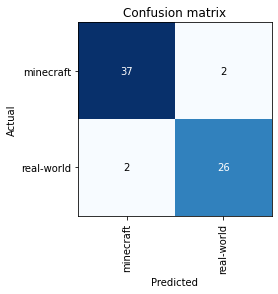

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

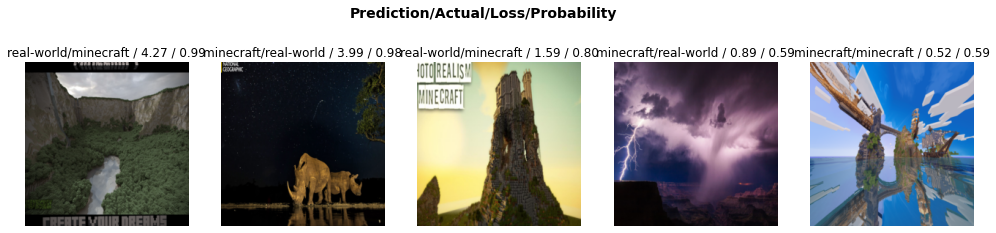

In [13]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [40]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

In [16]:
learn.save('model')

Path('models/model.pth')

In [18]:
learn.export('model.pkl')